# Machine Learning Challenge 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcdefaults()
plt.style.use("seaborn")
plt.rc("figure", figsize=(11.2, 6.3))

## Data Analysis

In [2]:
trainData = pd.read_csv('data_train_db.csv')
trainData.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.311500,0.824642,0.732381,0.670628,0.658450,0.732612,0.724687,0.710984,0.650322,5.055976,...,0.727262,0.696894,0.750866,0.734427,0.709659,0.718897,0.657022,0.713340,0.737840,0.658718
std,0.463222,0.712109,2.280995,1.275480,1.410498,0.932445,1.290294,0.546794,1.896914,2.913774,...,1.486712,1.137658,1.026275,1.003642,1.767397,0.881690,2.225722,1.950032,1.714560,1.515071
min,0.000000,-22.759721,-38.055832,-40.878137,-50.779683,0.400771,-18.190763,-9.042823,-58.024379,-16.002695,...,-10.323221,-37.190701,0.400418,-2.200456,-35.383528,-14.777491,-78.787165,-59.091836,-38.224559,-63.751219
25%,0.000000,1.000000,0.549734,0.542930,0.551090,0.555667,0.549273,0.560411,0.545552,2.604643,...,0.547473,0.544204,0.557663,0.542622,0.558572,0.553339,0.554327,0.548380,0.551331,0.548054
50%,0.000000,1.000000,0.698123,0.696592,0.706609,0.698498,0.690762,0.704883,0.686504,5.259820,...,0.693606,0.690501,0.710034,0.703849,0.700996,0.710563,0.704225,0.703970,0.702484,0.706985
75%,1.000000,1.000000,0.849506,0.844798,0.852589,0.850872,0.851927,0.851071,0.847418,7.473587,...,0.849670,0.848295,0.852120,0.849593,0.850362,0.851460,0.862595,0.859953,0.851893,0.847668
max,1.000000,12.440382,77.644402,26.567088,2.181685,37.371873,49.427813,15.914141,41.007128,15.007247,...,64.521486,24.881777,27.812705,37.703893,63.615672,21.558254,33.059216,45.192744,50.991319,3.883941


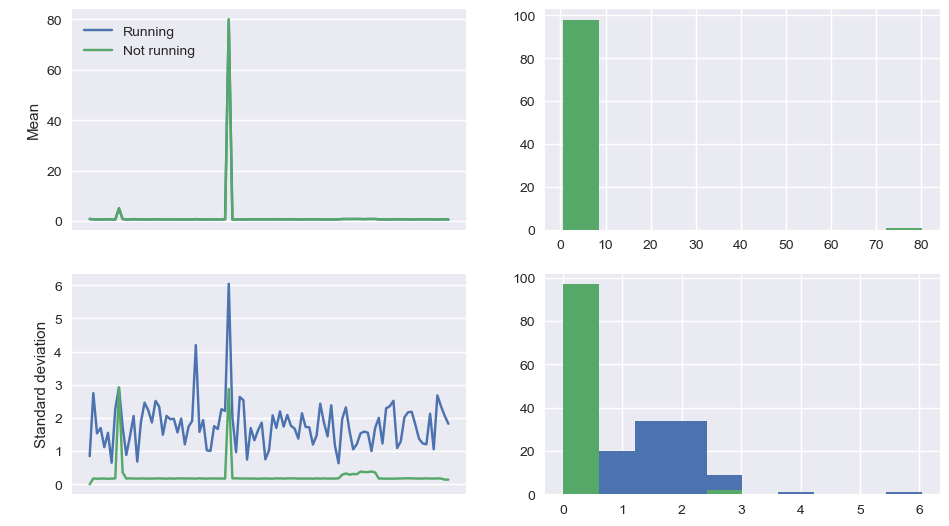

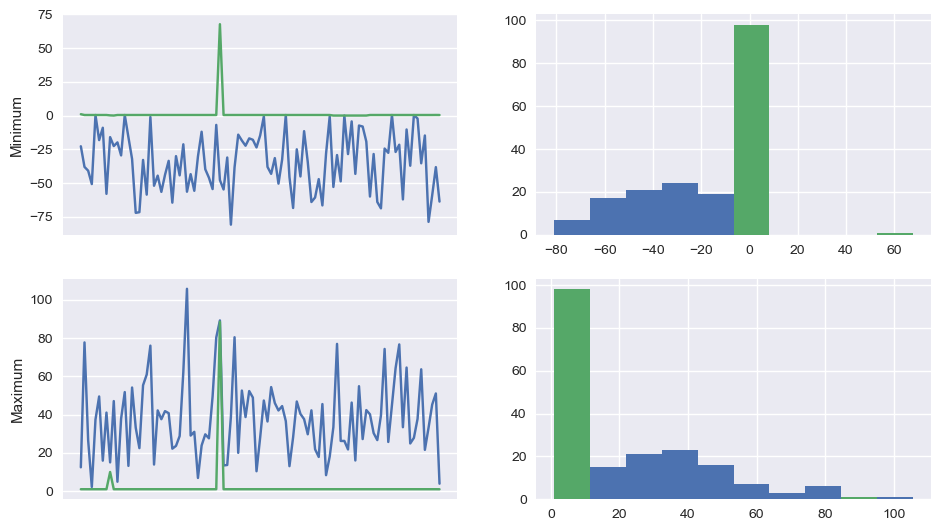

In [3]:
runningGroup = trainData.groupby("Running")

fig1, axs1 = plt.subplots(2, 2)

runningGroup.mean().T.plot(ax=axs1[0,0], legend=False, xticks=[])
runningGroup.mean().T.plot(kind="hist", ax=axs1[0,1], legend=False)
axs1[0,0].set_ylabel("Mean")
axs1[0,1].set_ylabel("")

runningGroup.std().T.plot(ax=axs1[1,0], legend=False, xticks=[])
runningGroup.std().T.plot(kind="hist", ax=axs1[1,1], legend=False)
axs1[1,0].set_ylabel("Standard deviation")
axs1[1,1].set_ylabel("")

fig1.legend(labels = ["Running", "Not running"], bbox_to_anchor=(0.185, 0.815))
plt.show()


fig2, axs2 = plt.subplots(2, 2)

runningGroup.min().T.plot(ax=axs2[0,0], legend=False, xticks=[])
runningGroup.min().T.plot(kind="hist", ax=axs2[0,1], legend=False)
axs2[0,0].set_ylabel("Minimum")
axs2[0,1].set_ylabel("")

runningGroup.max().T.plot(ax=axs2[1,0], legend=False, xticks=[])
runningGroup.max().T.plot(kind="hist", ax=axs2[1,1], legend=False)
axs2[1,0].set_ylabel("Maximum")
axs2[1,1].set_ylabel("")

plt.show()

## Data Cleanup

In [4]:
binaryCols = "Running", "Blue Switch On", "User had coffee", "Controller lightgoldenrodyellow", "Controller lightgray", "Controller lightgreen", "Cruise control", "Voltage main", "Voltage secondary", "Counterweight", "Second Counterweight", "Smoke formation", "Bending of test plate"
nonnegativeCols = "CPU Temperature", "Time since restart"
intervalCols = trainData.columns.difference(binaryCols).difference(nonnegativeCols) # every other column

for col in binaryCols:
    dropIndices = trainData[(trainData[col] != 0) & (trainData[col] != 1)].index

for col in nonnegativeCols:
    dropIndices.append(trainData[trainData[col] < 0].index)

for col in intervalCols:
    dropIndices.append(trainData[(trainData[col] > 1) | (trainData[col] < 0)].index)
    
cleanData = trainData.drop(index = dropIndices).drop_duplicates().reset_index(drop=True)
cleanData.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,0.312281,0.832080,0.698674,0.697404,0.702571,0.700912,0.699846,0.702833,0.695250,5.073251,...,0.697903,0.693599,0.704726,0.698827,0.701909,0.703049,0.706045,0.704670,0.702116,0.700706
std,0.463540,0.373889,0.174314,0.173770,0.173834,0.171117,0.173182,0.169713,0.173674,2.843286,...,0.174287,0.173832,0.170447,0.173419,0.171490,0.172158,0.176289,0.174138,0.173852,0.172825
min,0.000000,0.000000,0.400116,0.400507,0.400011,0.400771,0.400043,0.400128,0.400529,0.120367,...,0.400186,0.400070,0.400418,0.400256,0.400126,0.400041,0.400217,0.400230,0.400042,0.400339
25%,0.000000,1.000000,0.550249,0.544759,0.551983,0.555082,0.549291,0.560581,0.545835,2.620323,...,0.547633,0.544276,0.557506,0.542619,0.559102,0.553587,0.554721,0.548436,0.551295,0.548286
50%,0.000000,1.000000,0.698211,0.697266,0.707337,0.698051,0.690699,0.704544,0.686944,5.260622,...,0.693302,0.690485,0.709883,0.703575,0.701014,0.710466,0.704343,0.703867,0.702430,0.707089
75%,1.000000,1.000000,0.848981,0.844847,0.852291,0.848753,0.851189,0.850115,0.847443,7.475802,...,0.849355,0.847620,0.850643,0.847915,0.849944,0.850547,0.862463,0.859593,0.851007,0.847130
max,1.000000,1.000000,0.999983,0.999903,0.999910,0.999647,0.999997,0.999594,0.999753,9.988460,...,0.999854,0.999861,0.999526,0.999934,0.999992,0.998959,0.999804,0.999978,0.999159,0.999895


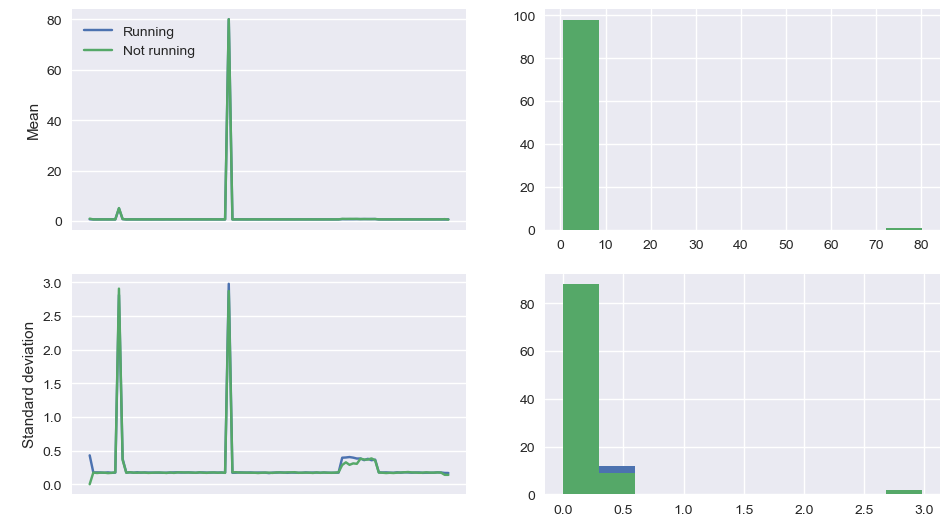

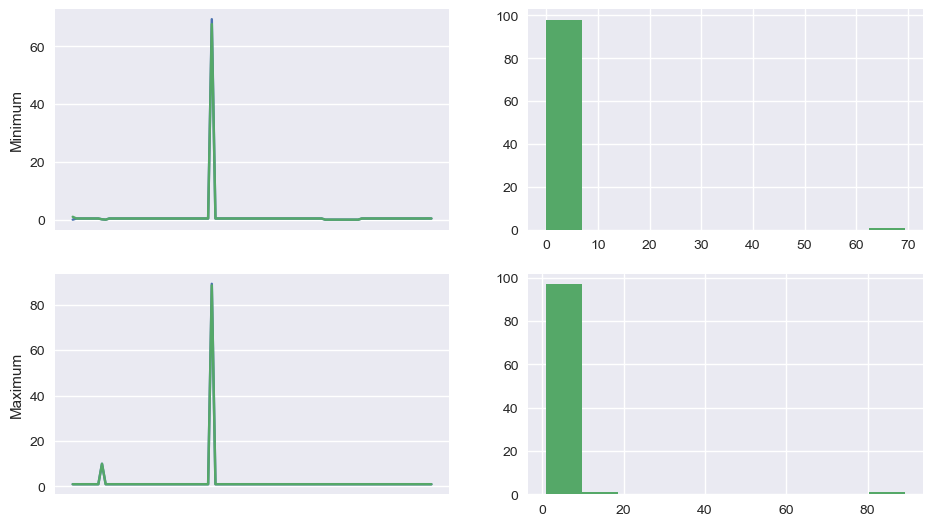

In [5]:
cleanGroup = cleanData.groupby("Running")

fig1, axs1 = plt.subplots(2, 2)

cleanGroup.mean().T.plot(ax=axs1[0,0], legend=False, xticks=[])
cleanGroup.mean().T.plot(kind="hist", ax=axs1[0,1], legend=False)
axs1[0,0].set_ylabel("Mean")
axs1[0,1].set_ylabel("")

cleanGroup.std().T.plot(ax=axs1[1,0], legend=False, xticks=[])
cleanGroup.std().T.plot(kind="hist", ax=axs1[1,1], legend=False)
axs1[1,0].set_ylabel("Standard deviation")
axs1[1,1].set_ylabel("")

fig1.legend(labels = ["Running", "Not running"], bbox_to_anchor=(0.185, 0.815))
plt.show()


fig2, axs2 = plt.subplots(2, 2)

cleanGroup.min().T.plot(ax=axs2[0,0], legend=False, xticks=[])
cleanGroup.min().T.plot(kind="hist", ax=axs2[0,1], legend=False)
axs2[0,0].set_ylabel("Minimum")
axs2[0,1].set_ylabel("")

cleanGroup.max().T.plot(ax=axs2[1,0], legend=False, xticks=[])
cleanGroup.max().T.plot(kind="hist", ax=axs2[1,1], legend=False)
axs2[1,0].set_ylabel("Maximum")
axs2[1,1].set_ylabel("")

plt.show()

## Balanced Data and Test Set

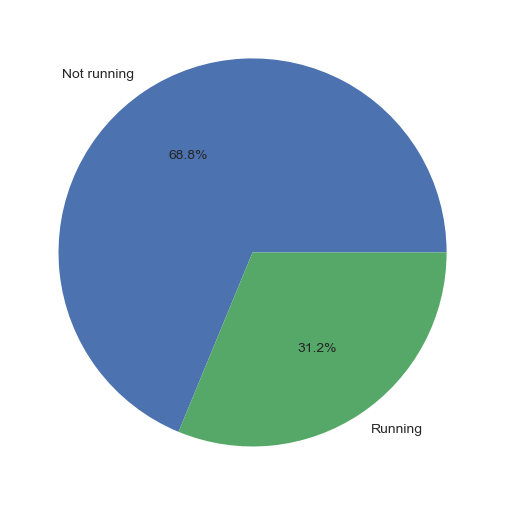

In [6]:
cleanData["Running"].value_counts().plot(kind="pie", label="", labels=["Not running", "Running"], autopct="%0.1f%%")
plt.show()

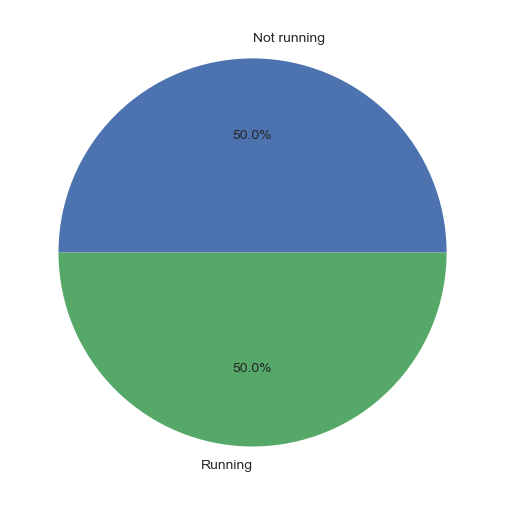

In [7]:
copyAmount = cleanData.shape[0] - 2 * cleanData[cleanData["Running"] == 1].shape[0]
balancedData = cleanData.append(cleanData[cleanData["Running"] == 1].sample(copyAmount, replace=True))
balancedData.reset_index(drop=True, inplace=True)
balancedData["Running"].value_counts().plot(kind="pie", labels=["Not running", "Running"], label="", autopct="%0.1f%%")
plt.show()

In [8]:
balancedRunning = balancedData[balancedData["Running"] == 1].sample(50)
balancedNotrunning = balancedData[balancedData["Running"] == 0].sample(50)
balancedTest = pd.concat([balancedRunning, balancedNotrunning])
balancedTrain = balancedData.drop(balancedTest.index)

trainX = balancedTrain.iloc[:, 1:].values
trainY = balancedTrain["Running"].values
testX = balancedTest.iloc[:, 1:].values
testY = balancedTest["Running"].values

np.savetxt("balanced_train_data.csv", trainX, delimiter=',')
np.savetxt("balanced_train_labels.csv", trainY, delimiter=',')
np.savetxt("balanced_test_data.csv", testX, delimiter=',')
np.savetxt("balanced_test_labels.csv", testY, delimiter=',')

## Data Analysis Classifier

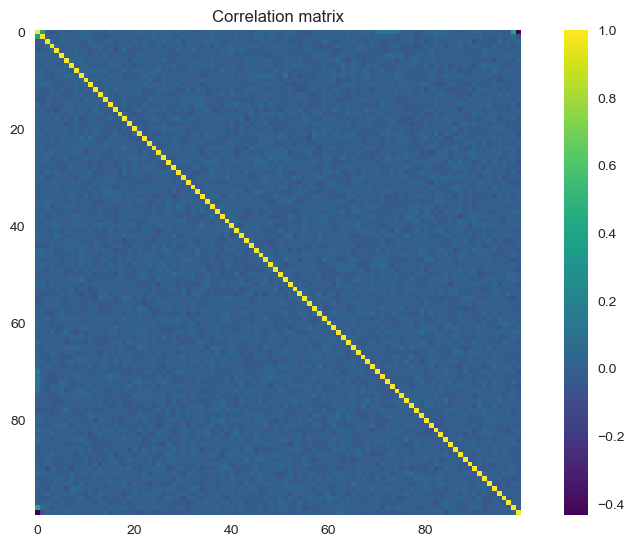

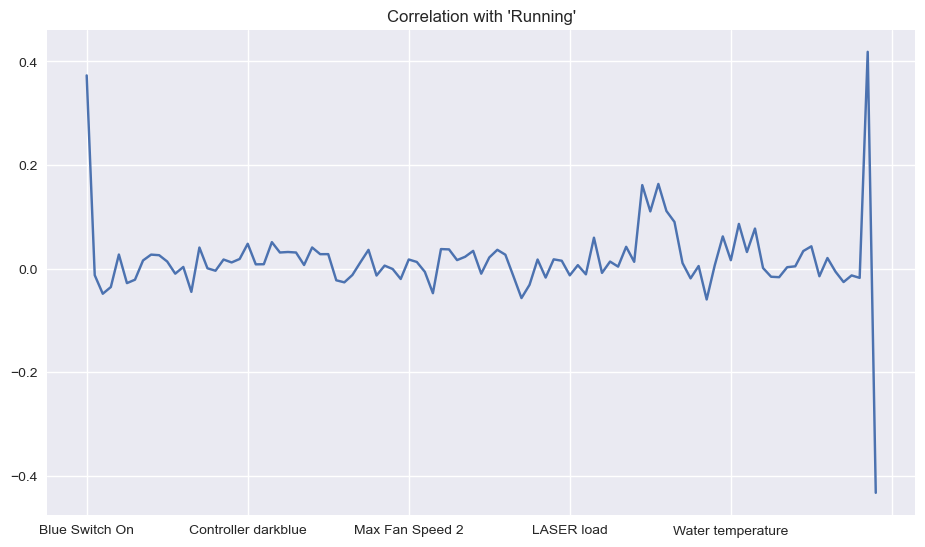

In [9]:
plt.imshow(balancedData.corr(), cmap="viridis", aspect="equal")
plt.colorbar()
plt.grid(False)
plt.title("Correlation matrix")
plt.show()

balancedData.corr()["Running"][1:].plot()
plt.title("Correlation with 'Running'")
plt.show()

In [10]:
corrCols = balancedData.loc[:, balancedData.corr()["Running"].abs() > 0.2].columns[1:]
balancedData.corr()["Running"][corrCols]

Blue Switch On          0.372910
Controller mistyrose    0.418471
Controller moccasin    -0.433162
Name: Running, dtype: float64

In [11]:
pd.crosstab(balancedData["Running"], balancedData["Blue Switch On"])

Blue Switch On,0.0,1.0
Running,,
0.0,335,1037
1.0,0,1372


In [12]:
class Classifier:
    def __init__(self):
        self.bestThreshold = None
    
    def predict(self, X, threshold=None):
        threshold = self.bestThreshold if threshold is None else threshold
        if threshold is None:
            raise Exception("Not trained yet.")
            
        switchOn = X[:, 0] == 1
        controllerDiff = X[:, 97] - X[:, 98] >= threshold
        predictedLabels = switchOn & controllerDiff
        return predictedLabels
    
    def fit(self, X, Y, fineness=10000):
        bestError = X.shape[0]
        for threshold in np.linspace(-1, 1, fineness+1):
            error = (self.predict(X, threshold=threshold) != Y).sum()
            if error < bestError:
                bestError = error
                self.bestThreshold = threshold
    
    def score(self, X, Y):
        return 1 - (self.predict(X) != Y).sum() / X.shape[0]

## Classifier Comparison

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Data Analysis", "Nearest Neighbors", "linear SVM", "polynomial SVM", "radial SVM", "sigmoid SVM",
         "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Neural Net", "Naive Bayes", "QDA"]

classifiers = [
    Classifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(trainX, trainY)
    score = clf.score(testX, testY)
    scores.append(score)
    print(f"{name:18}", score)

Data Analysis      0.94
Nearest Neighbors  0.64
linear SVM         0.89
polynomial SVM     0.59
radial SVM         0.58
sigmoid SVM        0.61
Gaussian Process   0.84
Decision Tree      0.97
Random Forest      0.96
AdaBoost           0.91
Neural Net         0.91
Naive Bayes        0.63
QDA                0.62


c:\program files\python38\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [14]:
ourClassifier = classifiers[np.argmax(scores)]

## Save Predicted Labels

In [15]:
testData = pd.read_csv('data_test_db.csv')
predictedLabels = ourClassifier.predict(testData.iloc[:, 1:].values)
np.savetxt('TEAMNAME_prediction.csv', predictedLabels, delimiter=',')